## Linear Regression이란?

#### 딥러닝의 딥은 통계의 결과들이 무수히 얽혀있는 즉 연산들이 복잡하다는 뜻의 Deep이다.
이 연산중에서 가장 기본이 되는 연산이 바로 Linear Regression 선형회귀다.
여기서는 과연 선형회귀가 어떤 것인지 차근차근 살펴보겠다

학생들과 성적의 관계
학생들마다 다 다양한 성적 분포를 가지는데...여기에 어떤 연관이 있는지 알아내고
그 연관 관계를 이용해서 결국에는 특정학생의 성적을 예측해보자.
학생들의 기말고사 성적은 [      ]에 따라 다르다

[     ]안에 시험성적을 좌우할 만한 요소들로 무엇이 있을까?
여기서 [     ]안에 들어갈 내용을 '정보'라 한다. 머신러닝과 딥러닝은 이 정보가 필요하다. 
정보를 정확히 준비해 놓기만 하면 성적을 예측하는 방정식을 만들수 있다.

이것을 수학적으로 정의하면, 성적을 변하게 하는 '정보' 요소를 X라 하고, 이 값에 따라 변하는 '성적'을 Y라 한다. 'X값이 변함에 따라 Y값도 변한다'는 정의 안에서 독립적으로 변할수 있는 값 X를 독립변수라 한다.
또한, 이 독립 변수에 따라 종속적으로 변하는 Y를 종속변수라 한다.
선형회귀는 독립변수 X를 이용해서 종속변수 Y를 예측하고 설명하는 작업을 말한다.

### 예측선 그리기

#### 기말고사를 준비하는 학생들을 대상으로 자료를 조사한 결과를 바탕으로 공부한 시간을 통해서 시험성 적을 예측하자
     X = [2,  4,  6,  8]
     Y = [81, 93, 91, 97]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system!!') 

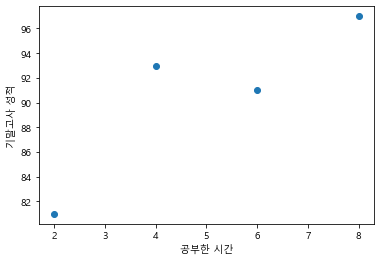

In [3]:
X = [2,  4,  6,  8]
Y = [81, 93, 91, 97]

plt.scatter(X,Y)
plt.xlabel('공부한 시간')
plt.ylabel('기말고사 성적')
plt.show()

#### 왼쪽이 아래로 향하고 오른쪽이 위를 향하는 선형(직선으로 표시되는 형태의 그래프)을 보인다. 선형회귀는 이 점들의 특징을 가장 잘 나타내는 선을 그리는 과정이다.  여기서 선은 곧 일차함수 그래프이며 다음과 같은 공식으로 표현된다.
### <center>y = ax + b  </center>
#### 여기서 x값은 독립변수이고 y값은 종속변수이다. 즉, x 값에 따라서 y값은 반드시 달라진다. 다만, 정확하게 계산하려면 상수 a와 b의 값을 알아야한다.
#### 따라서 선형회귀문제는 결과적으로 a와 b값을 알아내는 문제이다.

### 최소제곱법
    일차함수의 기울기 a와 절편 b를 구할수 있다
    
    a = (x-x평균)(y-y평균)의 합 / (x-x평균)**의 합
    b = y의 평균-(x의 평균x기울기a)
    
    a = 2.3    b = 79

### <center>y = 2.3x + 79</center>

In [5]:
mx = np.mean(X)
my = np.mean(Y)

divisor = sum([(i-mx)**2 for i in X])

def top(X, mx, Y, my):
    d = 0
    for i in range(len(X)):
        d += (X[i] -mx)*(Y[i]-my)
    return d

dividend = top(X,mx,Y, my)

a=dividend/divisor

b = my-(mx*a)

print(a,b)

2.3 79.0


In [6]:
#numpy로 바꿔줘야한다
X = np.array(X)
Y = np.array(Y)

predict = a*X+b
predict

array([83.6, 88.2, 92.8, 97.4])

#### 알아낸 a,b값을 가지고 제대로 잘 예측했는지를 시각화

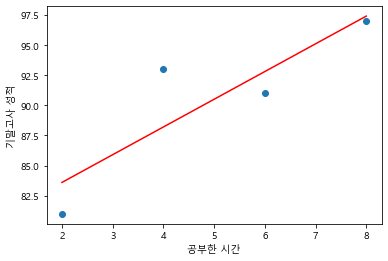

In [9]:
plt.scatter(X,Y)
plt.plot(X, predict, c='r')

plt.xlabel('공부한 시간')
plt.ylabel('기말고사 성적')
plt.show()

### 평균제곱 오차 
   $$
   \frac{1}{n}\sum(pred_i - y_i)^2
   $$

#### 평균제곱 오차가 작다는 것은 실제값과 예측값 사이의 간극이 크지 않다는 것을 말한다.
    앞으로 딥러닝과 머신러닝을 공부할때 굉장히 많이 나오는 공식으로 이 값이 작으면 작을수록 예측한값의
    정확도가 높아짐을 의미한다.
#### 선형회귀란 임의의 직선을 그어서 이에 대한 평균제곱 오차를 구하고 이 값을 가장 작게 만들어주는  a와 b값을 찾아가는 작업이다.
    평균제곱오차 값이 0이 가까운 a와 b를 찾아가는 작업

In [10]:
def mse(y_hat, y):
    return ((y_hat - y)**2).mean()

In [11]:
mse(predict, Y)

8.299999999999985